In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_json('logins.json')

In [3]:
len(data)

93142

In [4]:
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
data = data.sort_index()

In [7]:
data = data.set_index('login_time')

In [8]:
data['record'] = 1.0

In [9]:
data.head()

,record
login_time,
1970-01-01 20:13:18,1.0
1970-01-01 20:16:10,1.0
1970-01-01 20:16:37,1.0
1970-01-01 20:16:36,1.0
1970-01-01 20:26:21,1.0


In [10]:
data_resampled = data.resample('15T').count()

In [11]:
data_resampled.head()

,record
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


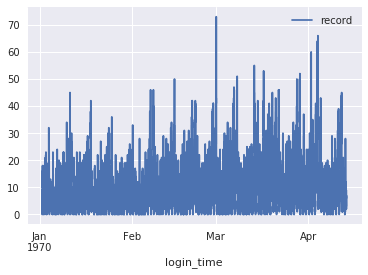

In [12]:
data_resampled.plot()

In [13]:
data_resampled_Jan = data_resampled.loc[data_resampled.index.month == 1]

In [14]:
data_resampled_Feb = data_resampled.loc[data_resampled.index.month == 2]

In [15]:
data_resampled_Mar = data_resampled.loc[data_resampled.index.month == 3]

In [16]:
data_resampled_Apr = data_resampled.loc[data_resampled.index.month == 4]

In [17]:
len(data_resampled_Jan)

2896

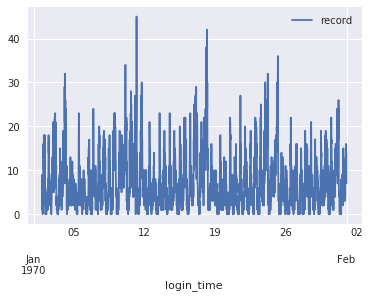

In [18]:
data_resampled_Jan.plot()

In the graph above, for the the first week, we see spikes on the 3rd and 4th of January.This corresponds to weekends. We see some majot activity the following two weekends. The activity slighly decreases during the last weekend of the month. We also observe that login activity is lowest on Mondays and Tuesdays.

In [19]:
len(data_resampled_Feb)

2688

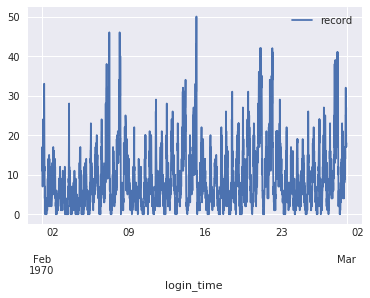

In [20]:
data_resampled_Feb.plot()

We see similar trends for weekends and weekdays as in January. However, we see that the overall number of login counts have come down a little.

In [21]:
len(data_resampled_Mar)

2976

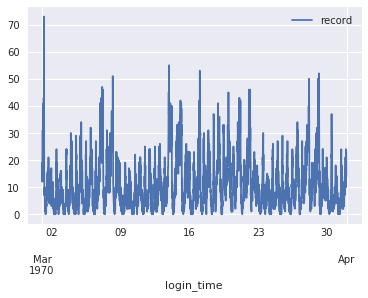

In [22]:
data_resampled_Mar.plot()

The number of registered logins is almost equal to that of January. The spikes and decrease in activity echo the months of Jan and Feb

In [23]:
len(data_resampled_Apr)

1228

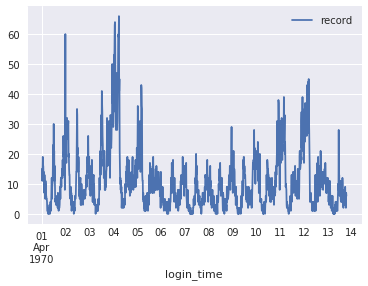

In [24]:
data_resampled_Apr.plot()

In [25]:
import datetime as dt

In [26]:
#Get most important hours of activity!
data_resample_Jan_weekend = data_resampled_Jan.loc[(data_resampled_Jan.index.day == 3) |  (data_resampled_Jan.index.day == 4)]

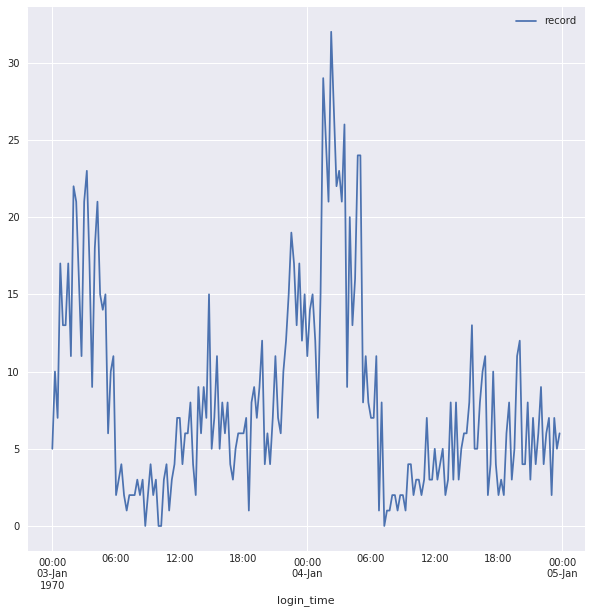

In [27]:
f, ax = plt.subplots(1, 1, figsize = (10, 10))
data_resample_Jan_weekend.plot(ax=ax)

From the graph, it looks like a majority of the logins happen at night on the weekends and more importantly, Saturday nights and early hours of Sunday happen to record the most logins

In [28]:
data.index.day_name()

Index(['Thursday', 'Thursday', 'Thursday', 'Thursday', 'Thursday', 'Thursday',
       'Thursday', 'Thursday', 'Thursday', 'Thursday',
       ...
       'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
       'Monday', 'Monday', 'Monday'],
      dtype='object', name='login_time', length=93142)

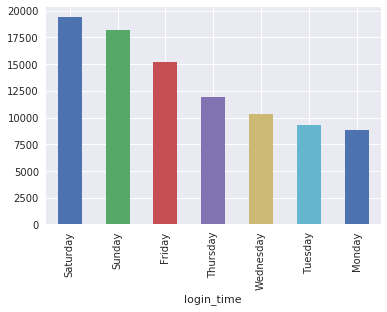

In [29]:
data.groupby([data.index.weekday_name])['record'].count().sort_values(ascending=False).plot(kind = 'bar')

Unsurprisingly, the weekends are the busiest hours. We also observe that people travel least during the first few days of the regular week.

In [30]:
Jan_data = data.loc[data.index.month == 1]
Feb_data = data.loc[data.index.month == 2]
Mar_data = data.loc[data.index.month == 3]
Apr_data = data.loc[data.index.month == 4]

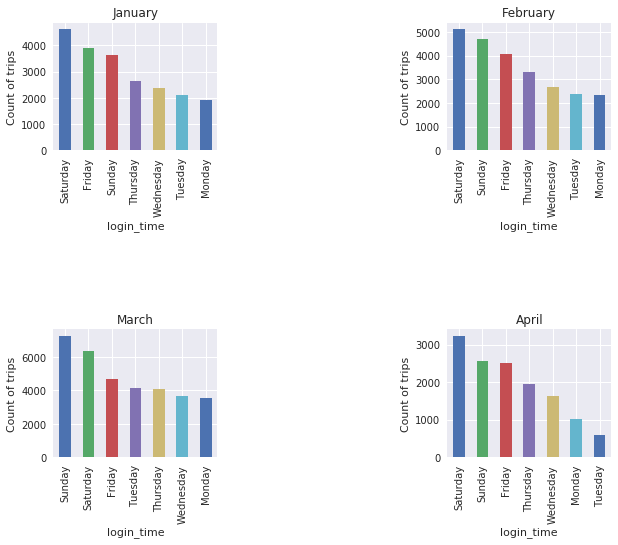

In [31]:
f, ax = plt.subplots(1, 1, figsize = (10, 8))
ax.set_xlabel('Days of the week')
plt.subplot(3,3,1)
plt.title('January')
plt.ylabel('Count of trips')
Jan_data.groupby([Jan_data.index.weekday_name])['record'].count().sort_values(ascending=False).plot(kind = 'bar')
plt.subplot(3,3,3)
plt.title('February')
plt.ylabel('Count of trips')
Feb_data.groupby([Feb_data.index.weekday_name])['record'].count().sort_values(ascending=False).plot(kind = 'bar')
plt.subplot(3,3,7)
plt.title('March')
plt.ylabel('Count of trips')
Mar_data.groupby([Mar_data.index.weekday_name])['record'].count().sort_values(ascending=False).plot(kind = 'bar')
plt.subplot(3,3,9)
plt.title('April')
plt.ylabel('Count of trips')
Apr_data.groupby([Apr_data.index.weekday_name])['record'].count().sort_values(ascending=False).plot(kind = 'bar')


For February and March, Saturday and Sunday were the busiest days as opposed to Firday and Saturdau for January. We also observe that the overall number of trips has increased in March. This could indicate that people tend to travel more when the weather gets better. We only have 13 days of data for April and hence, we can't say if people travel more or less. But for the 13 days of data, Saturday and Sunday are the busiets days.

In [38]:
data.tail(3)

,record
login_time,
1970-04-13 18:54:02,1.0
1970-04-13 18:57:38,1.0
1970-04-13 18:54:23,1.0


In [32]:
data_resample_Jan_weekdays = data_resampled_Jan.loc[(data_resampled_Jan.index.day == 5) |  (data_resampled_Jan.index.day == 6)]

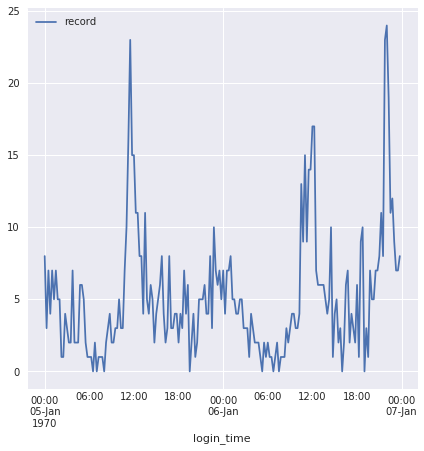

In [33]:
f, ax = plt.subplots(1, 1, figsize = (7, 7))
data_resample_Jan_weekdays.plot(ax =  ax)

On Mondays and Tuesdays mornings, we observe a steady rise in the number of logins. An expected result considering that people are trying to get to work.